In [ ]:
#第一个自己写的画图不行，第二个复制的可以

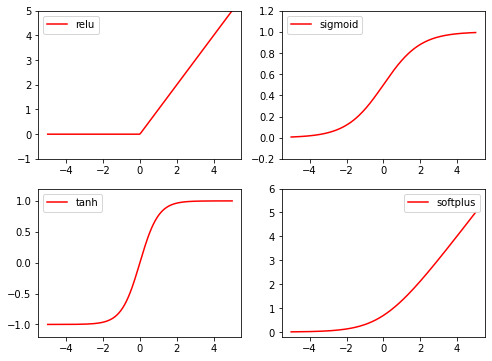

In [2]:
#2.3Activation Function
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

#fake data
x=torch.linspace(-5,5,200)
x_np=x.numpy()

#following are popular activation functions
y_relu=torch.relu(x).numpy()
y_sigmoid=torch.sigmoid(x).numpy()
y_tanh=torch.tanh(x).numpy()
y_softplus = F.softplus(x).numpy()

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

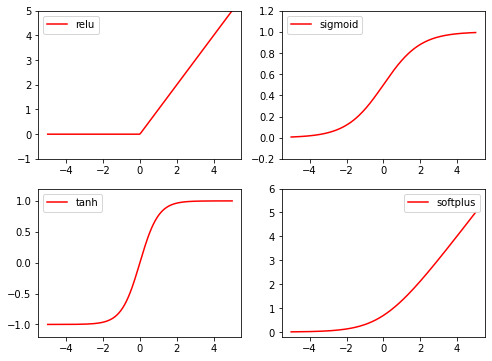

In [1]:
#2.3Activation Function
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

#fake data
x=torch.linspace(-5,5,200)
x_np=x.numpy()

#following are popular activation functions
y_relu=torch.relu(x).numpy()
y_sigmoid=torch.sigmoid(x).numpy()
y_tanh=torch.tanh(x).numpy()
y_softplus = F.softplus(x).numpy()

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

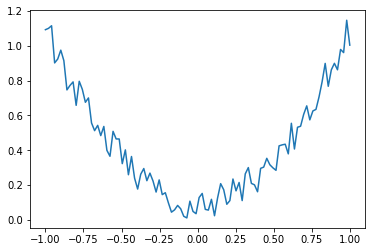

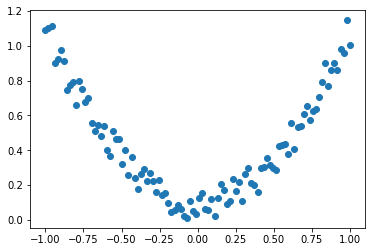

In [6]:
import torch
import torch.nn.functional as F

x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())

plt.figure(1)
plt.plot(x.numpy(),y.numpy())
plt.figure(2)
plt.scatter(x.numpy(),y.numpy())
plt.show()



In [40]:
#regression

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib


x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())

# plt.scatter(x.numpy(),y.numpy())
# plt.show()

class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=torch.relu(self.hidden(x))
        x=self.predict(x)
        return x

net=Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

optimizer=torch.optim.SGD(net.parameters(),lr=0.2)
loss_func=torch.nn.MSELoss()

plt.ion()

for t in range(200):
    prediction=net(x)
    
    loss=loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%5==0:
        plt.cla()
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),prediction.data.numpy(),'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()
%matplotlib

Using matplotlib backend: TkAgg
Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Using matplotlib backend: TkAgg
